# 取最多的 20 組表情 group， 弄成 balance 資料
## 目標
> ### 1. 由 tomek link 後的資料 (767695 筆)，將前 20 高的 group 選出來
> ### 2. smote 將少的資料補到 20 個 group 的平均
> ### 3. enn 做 undersampling

### 1. Tomek Link mamual : 
https://imbalanced-learn.org/stable/under_sampling.html#tomek-s-links
### 2. smote + enn mamual : 
https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html

In [95]:
#! pip install -U scikit-learn
#! pip install -U imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time, math

import sklearn
print(f'scikit-learn version: {sklearn.__version__}')
from sklearn.model_selection import train_test_split



import imblearn

from imblearn.combine import SMOTEENN
print(f'imbalanced-learn version: {imblearn.__version__}')

import warnings
warnings.filterwarnings("ignore")

scikit-learn version: 1.1.0
imbalanced-learn version: 0.9.1


## 匯入資料 (使用做過 tomek link 、已取出前 20 名、已將測試集丟出去的 group 的資料)
`20train.pkl`、`20trainlabel.pkl`

In [2]:
#path_ = r'C:\Users\e2414\OneDrive\桌面\專題\AllData\training'  #資料從哪裡來
path_ = r'F:\專題\AllData\training\final_training' 

path_test = r'F:\專題\AllData\training\final_training\測試集再sampling'
path_ori = r'F:\專題\AllData\training\final_training\原始資料'
path_imb = r'F:\專題\AllData\training\final_training\十萬imbal'

path_bal = r'F:\專題\AllData\training\final_training\較bal'
path_pca = r'F:\專題\AllData\training\final_training\PCA'
path_tse = r'F:\專題\AllData\training\final_training\tomek_smote_enn'
path_tsne = r'F:\專題\AllData\training\final_training\tsne'

In [3]:

%%time
with open(path_pca+ r"/X_train_total_pc20.pkl", "rb") as f:
    train = pickle.load(f)
    
with open(path_ori+ r"/y_train.pkl", "rb") as f:
    trainlabel = pickle.load(f)
    
print(train.shape)
print(len(trainlabel))

(745961, 20)
745961
Wall time: 77.8 ms
Wall time: 77.8 ms


In [4]:
%%time
label = list(range(1, 40+1))
train_count = [trainlabel.count(i) for i in label]
train_mean = np.mean(train_count)

print(train_count)
print(train_mean)

[99928, 88854, 64269, 58830, 53435, 39380, 40830, 30052, 29669, 25622, 22693, 22700, 20563, 14118, 16391, 10761, 10528, 10371, 9168, 8691, 8627, 7507, 7211, 5694, 5352, 4513, 3920, 3823, 3560, 3461, 2323, 2281, 2015, 1530, 1447, 1431, 1182, 1238, 1092, 901]
18649.025
Wall time: 328 ms


Wall time: 79.6 ms


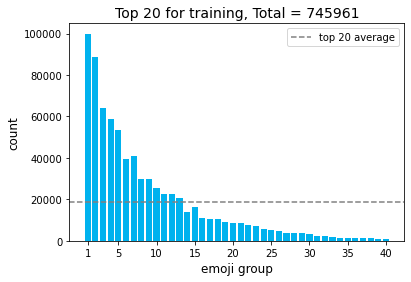

In [5]:
%%time
#fig= plt.figure(figsize= [16, 12])
plt.bar(label, train_count, color = '#00B2EE')
plt.axhline(y=train_mean, c="gray", ls="--", lw=1.5, label = 'top 20 average')

xlabel = [1]+ list(range(5, 40+1, 5))
plt.xticks(xlabel) 
plt.title(f'Top 20 for training, Total = {sum(train_count)}', size = 14)
plt.xlabel('emoji group', size = 12)
plt.ylabel('count', size = 12)
plt.legend()
#plt.savefig(path_go+ r'/top20.jpg')

<hr>

### 使用 smote + ENN 
- 字典內放 要 smote 到多少
- smote 後的 enn 採用預設，所有的資料皆要 resample


### 20 個 group 中，哪些 group 需要 smote，smote 多少

In [6]:
smote_label = [i+1 for i, v in enumerate(list(train_count<train_mean)) if v ==True]

print(f'針對這幾個 group: {smote_label} 做 smote 到 {int(train_mean)} 個')

針對這幾個 group: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] 做 smote 到 18649 個


In [7]:
smonum = [int(train_mean)]*len(smote_label)
smo = dict(zip(smote_label, smonum))
print(smo)

{14: 18649, 15: 18649, 16: 18649, 17: 18649, 18: 18649, 19: 18649, 20: 18649, 21: 18649, 22: 18649, 23: 18649, 24: 18649, 25: 18649, 26: 18649, 27: 18649, 28: 18649, 29: 18649, 30: 18649, 31: 18649, 32: 18649, 33: 18649, 34: 18649, 35: 18649, 36: 18649, 37: 18649, 38: 18649, 39: 18649, 40: 18649}


In [14]:
%%time 
X_res, y_res = SMOTEENN(smo).fit_resample(train, trainlabel)

print(X_res.shape)
print(len(y_res))

#1:01開始跑

(310821, 20)
310821
Wall time: 38min 32s


In [15]:
after_train_count = [y_res.count(i) for i in label]
after_train_mean = np.mean(after_train_count)

print(after_train_count)
print(after_train_mean)

[6011, 4893, 4266, 509, 20864, 404, 1802, 924, 1390, 2216, 2436, 976, 833, 1246, 383, 2976, 4695, 4852, 4667, 6186, 5911, 7547, 6835, 8330, 10209, 11072, 10968, 12699, 14027, 7980, 13491, 14127, 13035, 14660, 13357, 14780, 15897, 13669, 15113, 14585]
7770.525


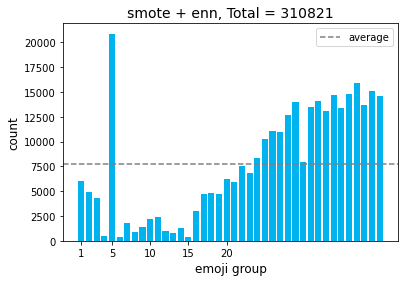

In [17]:
plt.bar(label, after_train_count, color = '#00B2EE')
plt.axhline(y=after_train_mean, c="gray", ls="--", lw=1.5, label = 'average')

xlabel = [1]+ list(range(5, 20+1, 5))
plt.xticks(xlabel) 
plt.title(f'smote + enn, Total = {sum(after_train_count)}', size = 14)
plt.xlabel('emoji group', size = 12)
plt.ylabel('count', size = 12)
plt.legend()
#plt.savefig(path_+ r'/top20_smoteenn.jpg')

In [11]:
path_

'E:\\專題\\AllData\\training\\final_training'

### 匯出檔案

In [18]:
%%time
with open(path_tse+ '/X_smoenn_g40.pkl','wb') as f:
    pickle.dump(X_res, f)

with open(path_tse+ '/y_smoenn_g40.pkl','wb') as f:
    pickle.dump(y_res, f)

Wall time: 1.87 s


<hr>

## 畫圖

In [13]:
%%time
with open(path_tse+ r"/y_smoenn_g40.pkl", "rb") as f:
    trainlabel = pickle.load(f)

Wall time: 2.67 s


In [14]:
count = [trainlabel.count(i) for i in list(range(1, 40+1))]

Wall time: 48.3 ms


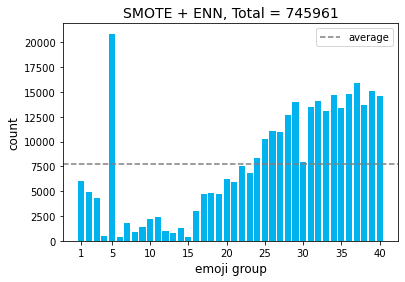

In [17]:
%%time
#fig= plt.figure(figsize= [16, 12])
plt.bar(label, count, color = '#00B2EE')
plt.axhline(y=np.mean(count), c="gray", ls="--", lw=1.5, label = 'average')

xlabel = [1]+ list(range(5, 40+1, 5))
plt.xticks(xlabel) 
plt.title(f'SMOTE + ENN, Total = {sum(train_count)}', size = 14)
plt.xlabel('emoji group', size = 12)
plt.ylabel('count', size = 12)
plt.legend()
#plt.savefig(path_go+ r'/top20.jpg')